### Topic and cluster evaluation
This notebooks evaluates the results from the LSA and cluster analysis on the duurzaamheidsvisies. The results of both analyses are imported from a parquet file. The evaluation data are imported from preprocessed CSV files.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# read files containing topics, clusters and evaluation data
lsa_topics = pd.read_parquet("../data/Governance/LSA_document_topic_matrix.parquet")
kmeans_clusters = pd.read_parquet("../data/Governance/Kmeans_clusters.parquet")
documents = pd.read_csv("../data/Governance/Duurzaamheidsvisies.csv")
documents['Jaar'] = documents['Jaar'].astype("string").str.slice(0, 4)
gemeenten = pd.read_parquet("../data/CBS/Evaluation_data.parquet")

In [5]:
# compose a dataframe with all information related to LSA topics
lsa_topics = lsa_topics.merge(documents, how="left", left_index=True, right_on='DocID')
lsa_topics['GM_Code'] = lsa_topics['DocID'].str.slice(0, 6)
lsa_topics = lsa_topics.merge(gemeenten, how="left", on='GM_Code')

In [ ]:
# compose a dataframe with all information related to K-means clusters
kmeans_clusters = kmeans_clusters.merge(documents, how="left", left_index=True, right_on='DocID')
kmeans_clusters['GM_Code'] = kmeans_clusters['DocID'].str.slice(0, 6)
kmeans_clusters = kmeans_clusters.merge(gemeenten, how="left", on='GM_Code')

In [6]:
lsa_topics.loc[:, ['DocID', 'Gemeente', 'milieu', 'Titel', 'Jaar']].sort_values('milieu', ascending=False)[0:20]

,DocID,Gemeente,milieu,Titel,Jaar
222,GM1729DV01,Gulpen-Wittem,0.402210,Milieubeleidsplan 2013-2016,2013
15,GM0063DV01,het Bildt,0.396955,Milieubeleidsplan,2015
202,GM1651DV01,Eemsmond,0.375925,Milieujaarprogramma 2014,2014
156,GM0733DV01,Lingewaal,0.373777,Kadernota Milieu,<NA>
46,GM0230DV01,Elburg,0.364064,Milieubeleidsplan Gemeente Elburg 2010-2013,2013
247,GM1987DV01,Menterwolde,0.362416,Milieubeleidsplan 2011,2011
2,GM0007DV01,Bellingwedde,0.355476,Milieubeleidsprogramma 2007-2015,2007
1,GM0005DV01,Bedum,0.354284,Milieubeleidsplan 2009-2012,2009
184,GM0873DV01,Woensdrecht,0.343657,Milieu- en Duurzaamheidsbeleid 2012-2016,2012
211,GM1695DV01,Noord-Beveland,0.340854,MILIEU-UITVOERINGSPLAN 2011-2014 GEMEENTE NOOR...,2010


<AxesSubplot:xlabel='Jaar', ylabel='milieu'>

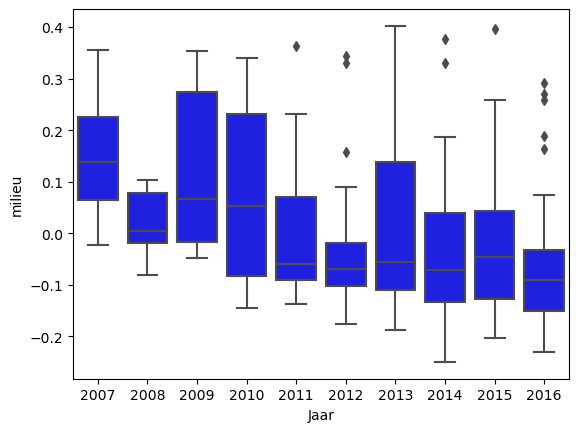

In [7]:
sns.boxplot(data=lsa_topics.sort_values('Jaar'), x='Jaar', y='milieu', color="blue")

Duurzaamheidsvisies die hoog score op het topic "milieu" zijn inderdaad vaker milieubeleidsplannen dan (integrale) duurzaamheidsvisies. Deze documenten zijn over het algemeen ook iets ouder dan de documenten met een lagere waarde voor het topic "milieu". Dit kan mede te maken hebben met de invoering van de omgevingsdiensten in 2013, waarbij veel van de uitvoerende taken op het gebied van milieu overgeheveld zijn van gemeenten naar omgevingsdiensten.

In [8]:
lsa_topics.loc[:, ['DocID', 'Gemeente', 'ruimtelijke inrichting', 'Titel', 'Jaar']].sort_values('ruimtelijke inrichting', ascending=False)[0:20]

,DocID,Gemeente,ruimtelijke inrichting,Titel,Jaar
32,GM0164DV01,Hengelo (O.),0.332448,Duurzaamheidsagenda 2011-2014,2011
165,GM0757DV02,Boxtel,0.299648,"Boxtel 2020, duurzaam en dynamisch centrum in ...",2009
131,GM0603DV01,Rijswijk (ZH.),0.292670,Groenbeleid deel 1,2010
188,GM0935DV01,Maastricht,0.281450,Duurzaamheidskompas 2012 - Gemeente Maastricht,2012
166,GM0758DV01,Breda,0.276113,Duurzaamheidsvisie Breda 2030,<NA>
218,GM1719DV01,Drimmelen,0.274255,Duurzaamheidsvisie 2040,2013
236,GM1900DV01,Súdwest-Fryslân,0.266735,Duurzaamheidsnota 2012,2012
132,GM0603DV02,Rijswijk (ZH.),0.263463,Groenbeleid deel 2,2010
238,GM1904DV01,Stichtse Vecht,0.251962,Duurzaamheidsvisie 2014-2020,2013
128,GM0590DV01,Papendrecht,0.243963,Samen naar een duurzaam papendrecht 2020,2015


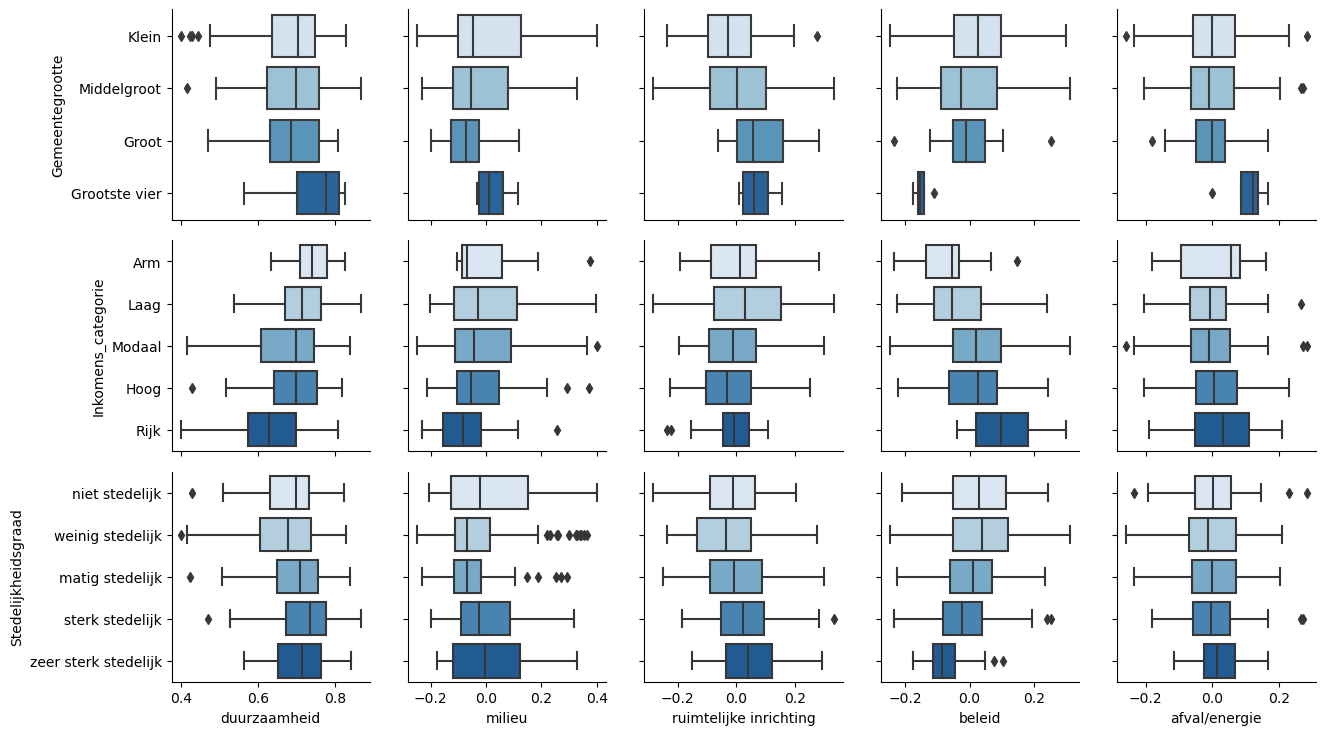

In [9]:
fig = sns.PairGrid(data=lsa_topics, palette="Blues",\
    x_vars=['duurzaamheid', 'milieu', 'ruimtelijke inrichting', 'beleid', 'afval/energie'],
    y_vars=['Gemeentegrootte', 'Inkomens_categorie', 'Stedelijkheidsgraad'])
fig.map(sns.boxplot)

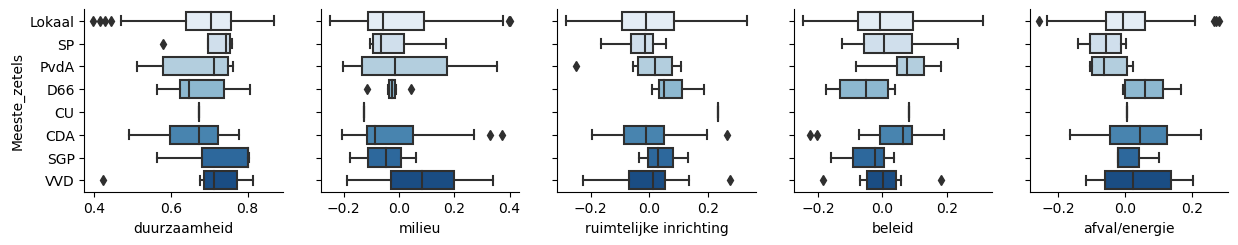

In [10]:
fig = sns.PairGrid(data=lsa_topics, palette="Blues",\
    x_vars=['duurzaamheid', 'milieu', 'ruimtelijke inrichting', 'beleid', 'afval/energie'],
    y_vars=['Meeste_zetels'])
fig.map(sns.boxplot, order=["Lokaal", "SP", "PvdA", "D66", "CU", "CDA", "SGP", "VVD"])

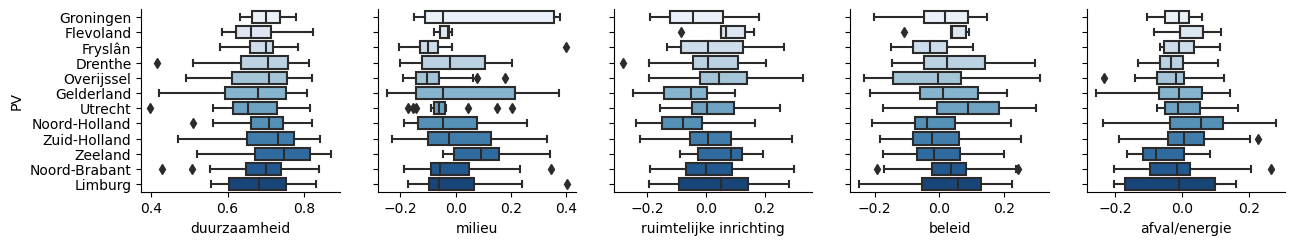

In [21]:
fig = sns.PairGrid(data=lsa_topics, palette="Blues",\
    x_vars=['duurzaamheid', 'milieu', 'ruimtelijke inrichting', 'beleid', 'afval/energie'],
    y_vars=['PV'])
fig.map(sns.boxplot)

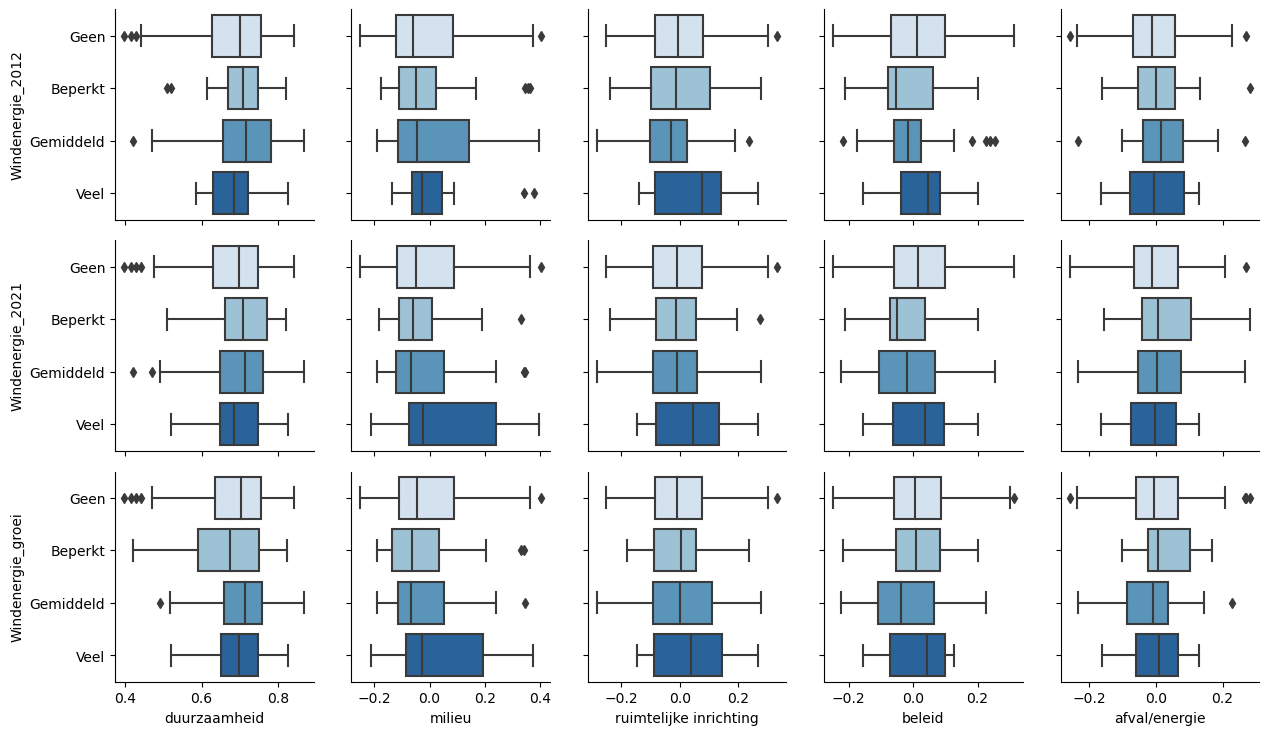

In [11]:
fig = sns.PairGrid(data=lsa_topics, palette="Blues",\
    x_vars=['duurzaamheid', 'milieu', 'ruimtelijke inrichting', 'beleid', 'afval/energie'],
    y_vars=['Windenergie_2012', 'Windenergie_2021', 'Windenergie_groei'])
fig.map(sns.boxplot, order=["Geen", "Beperkt", "Gemiddeld", "Veel"])

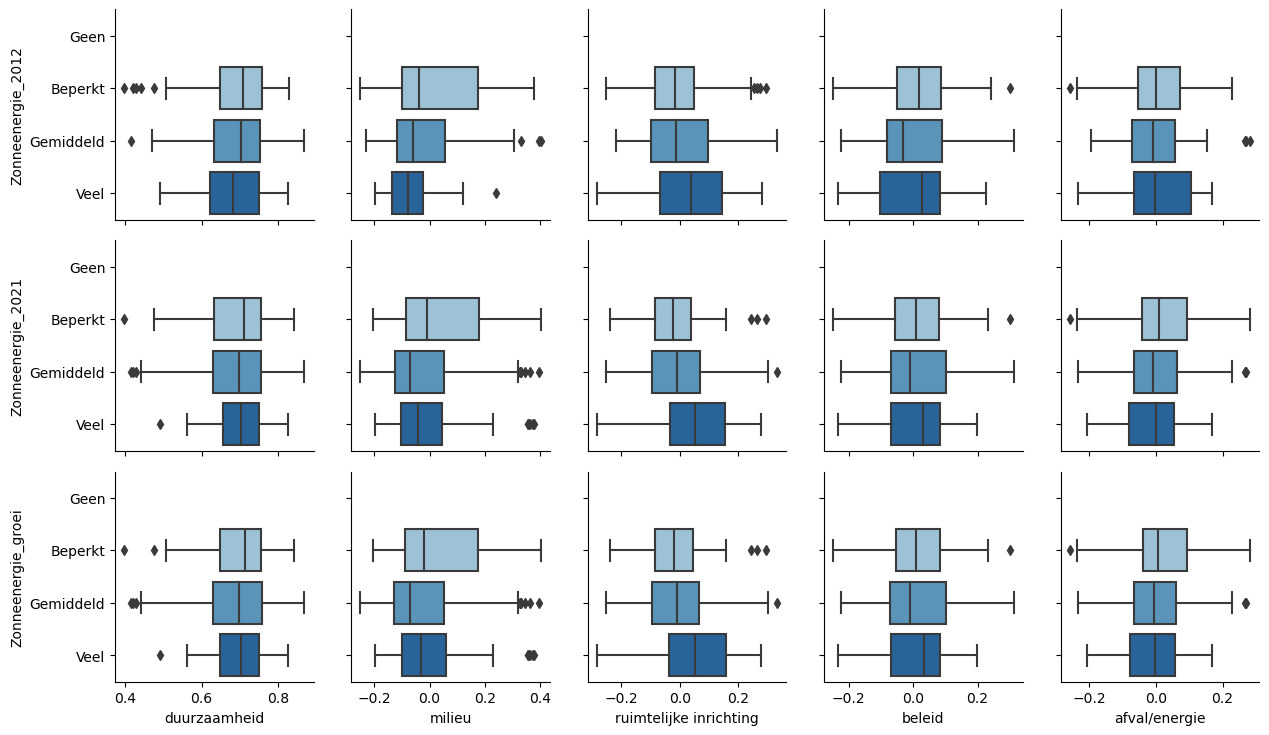

In [12]:
fig = sns.PairGrid(data=lsa_topics, palette="Blues",\
    x_vars=['duurzaamheid', 'milieu', 'ruimtelijke inrichting', 'beleid', 'afval/energie'],
    y_vars=['Zonneenergie_2012', 'Zonneenergie_2021', 'Zonneenergie_groei'])
fig.map(sns.boxplot, order=["Geen", "Beperkt", "Gemiddeld", "Veel"])

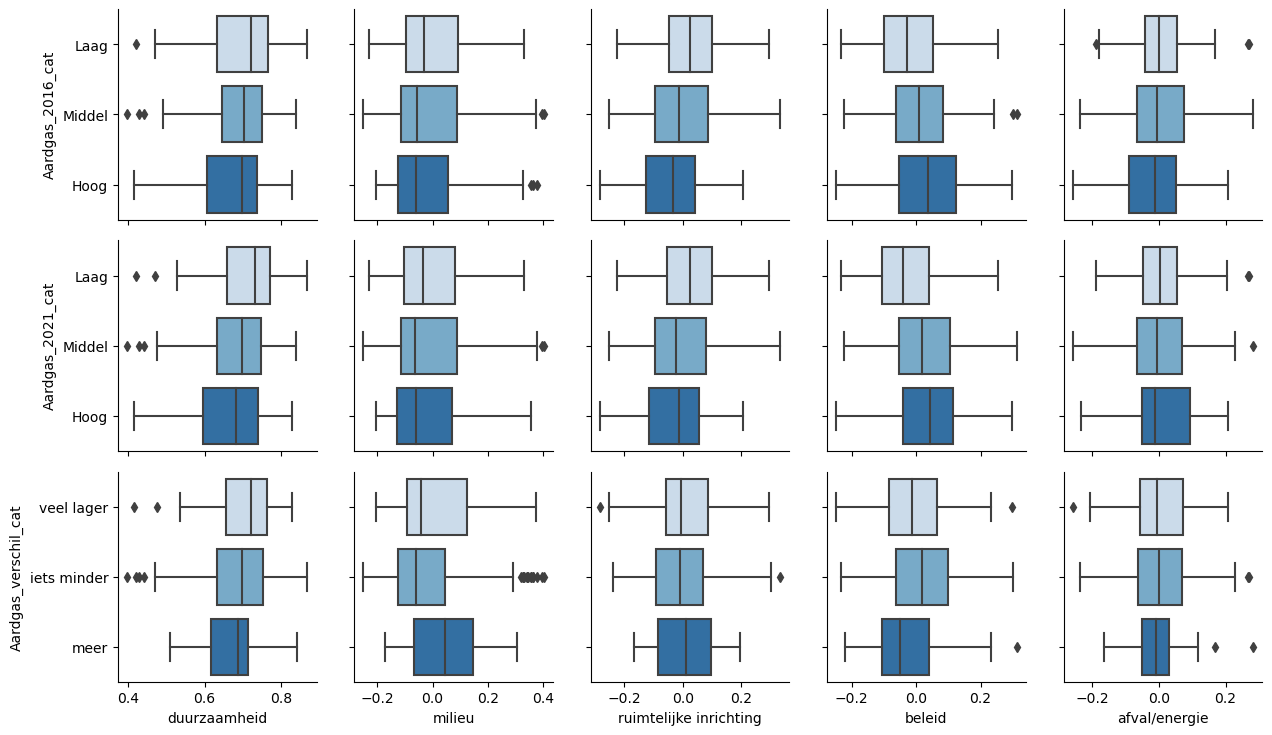

In [13]:
fig = sns.PairGrid(data=lsa_topics, palette="Blues",\
    x_vars=['duurzaamheid', 'milieu', 'ruimtelijke inrichting', 'beleid', 'afval/energie'],
    y_vars=['Aardgas_2016_cat', 'Aardgas_2021_cat', 'Aardgas_verschil_cat'])
fig.map(sns.boxplot)

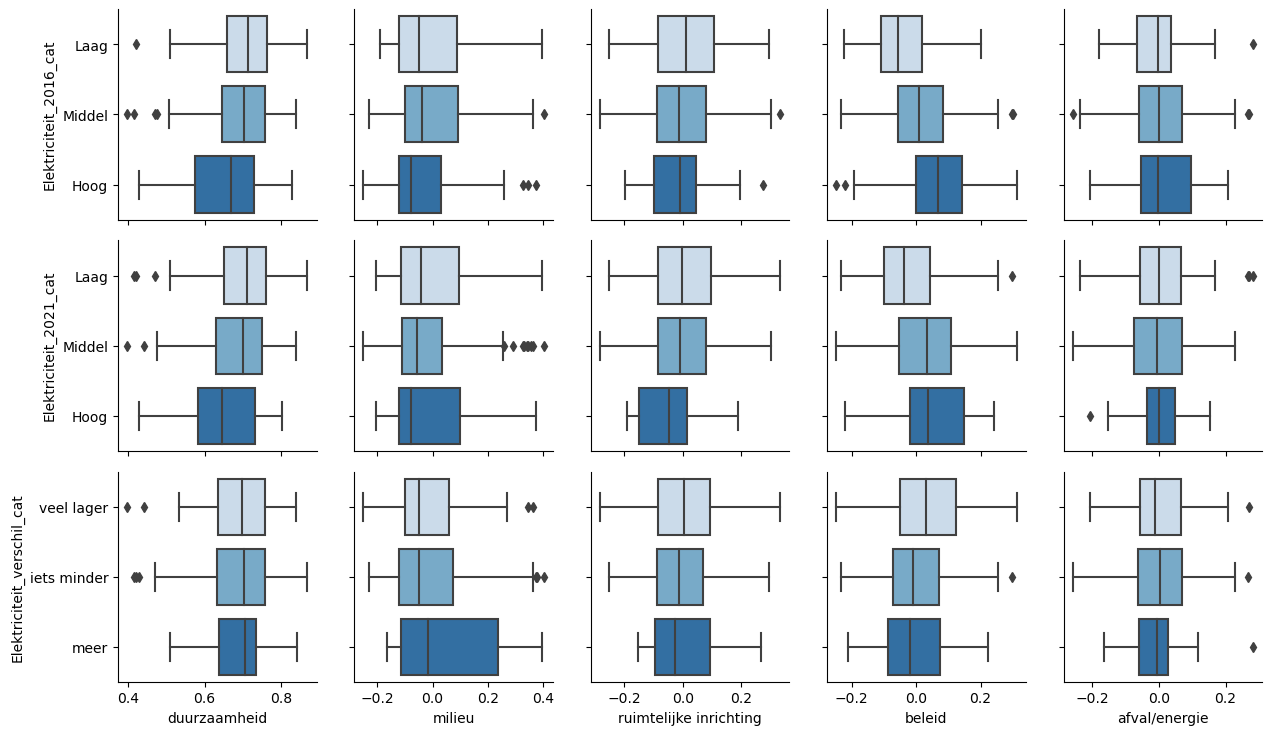

In [14]:
fig = sns.PairGrid(data=lsa_topics, palette="Blues",\
    x_vars=['duurzaamheid', 'milieu', 'ruimtelijke inrichting', 'beleid', 'afval/energie'],
    y_vars=['Elektriciteit_2016_cat', 'Elektriciteit_2021_cat', 'Elektriciteit_verschil_cat'])
fig.map(sns.boxplot)